# K最近邻

英文简写“KNN”即“K-Nearest-Neighbor”。

是一种简单监督机器学习算法，分类和回归均可用。

它是“基于实例的算法”。

因此不是预估一个模型，它保存全部训练模型到存储器然后通过相似度测量预测。

给定一个输入样本，KNN算法从存储器恢复K个最相似的实例。

相似度根据距离定义，拥有和输入样本最小距离（欧几里德）的训练样本被认为最相似。

输入样本的目标值计算如下——

分类：

- 无权重的，输出K最近邻中最常见的分类
- 带权重的，为每种分类值计算K最近邻权重总和，输出权重最高的分类

回归：

- 无权重的，输出K最近邻均值
- 带权重的，对所有分类值，分类值与相应权重的积的总和除以权重的总合——加权求和后除以总权重

带权重的KNN版本是该算法的精细版本，每个近邻的贡献根据和查询点的距离计算权重。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(123)

## 数据集合

X_train shape is (1347L, 64L)
y_train shape is (1347L,)
X_test shape is (450L, 64L)
y_test shape is (450L,)


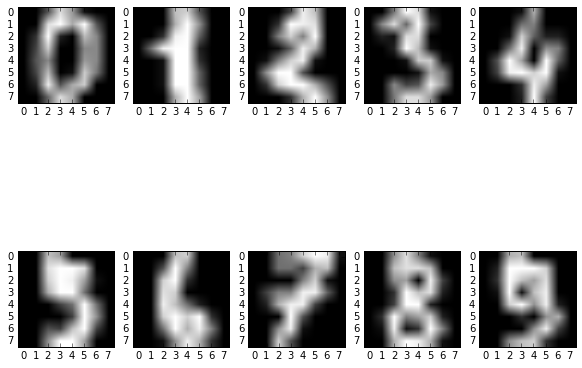

In [11]:
# 使用数字数据集合作为样本，由1797张手写数字图片组成，每张数字图片表示64维像素值的向量
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print "X_train shape is {0}".format(X_train.shape)
print "y_train shape is {0}".format(y_train.shape)
print "X_test shape is {0}".format(X_test.shape)
print "y_test shape is {0}".format(y_test.shape)

# 样本数字
fig = plt.figure(figsize=(10,8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap="gray")
plt.show()

# K最近邻类

In [38]:
class kNN:
    def __init__(self): pass
    def fit(self, X, y):
        self.data = X
        self.targets = y
    def euclidean_distance(self, X):
        '''计算训练数据和一个新的输入样本或输入样本矩阵的欧几里德距离'''
        # 输入：单数据点
        if X.ndim == 1:
            l2 = np.sqrt(np.sum((self.data - X)**2, axis=1))
        
        # 输入：数据点的矩阵
        if X.ndim == 2:
            n_samples, _ = X.shape
            l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]
        
        return np.array(l2)
    def predict(self, X, k=1):
        '''对一个输入样本或输入样本矩阵预测分类'''
        # 第一步：计算输入和训练数据的距离
        dists = self.euclidean_distance(X)
        
        # 第二步：查找K最近邻及其分类
        if X.ndim == 1:
            if k == 1:
                nn = np.argmin(dists)
                return self.targets[nn]
            else:
                knn = np.argsort(dists)[:k]
                y_knn = self.targets[knn]
                max_vote = max(y_knn, key=list(y_knn).count)
                return max_vote
        
        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            if k == 1:
                return y_knn.T
            else:
                n_samples, _ = X.shape
                max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
                return max_votes

## 初始化并训练模型

In [39]:
knn = kNN()
knn.fit(X_train, y_train)

print "====="
print "Testing one datapoint, k=1"
print "Predicted label: {0}".format(knn.predict(X_test[0], k=1))
print "True label: {0}".format(y_test[0])
print "====="
print "Testing one datapoint, k=5"
print "Predicted label: {0}".format(knn.predict(X_test[20], k=5))
print "True label: {0}".format(y_test[20])
print "====="
print "Testing 10 datapoints, k=1"
print "Predicted labels: {0}".format(knn.predict(X_test[5:15], k=1))
print "True labels: {0}".format(y_test[5:15])
print "====="
print "Testing 10 datapoints, k=4"
print "Predicted labels: {0}".format(knn.predict(X_test[5:15], k=4))
print "True labels: {0}".format(y_test[5:15])

=====
Testing one datapoint, k=1
Predicted label: 6
True label: 6
=====
Testing one datapoint, k=5
Predicted label: 4
True label: 4
=====
Testing 10 datapoints, k=1
Predicted labels: [[3 5 4 4 5 1 6 4 2 8]]
True labels: [3 5 4 4 5 1 6 4 2 8]
=====
Testing 10 datapoints, k=4
Predicted labels: [3, 5, 4, 4, 5, 1, 6, 4, 2, 8]
True labels: [3 5 4 4 5 1 6 4 2 8]


## 测试集合的精确度

In [42]:
y_p_test1 = knn.predict(X_test, k=1)
test_acc1 = float(np.sum(y_p_test1[0] == y_test)) / len(y_p_test1[0]) * 100
print "Test accuracy with k=1: {0}".format(test_acc1)

y_p_test2 = knn.predict(X_test, k=5)
test_acc2 = float(np.sum(y_p_test2 == y_test)) / len(y_p_test2) * 100
print "Test accuracy with k=5: {0}".format(test_acc2)

Test accuracy with k=1: 98.4444444444
Test accuracy with k=5: 97.7777777778
